In [1]:
from helpers import *
from structure import UmbrellaGrid

In [2]:
degree = 3
rows = 2
cols = 2
#---
grid = UmbrellaGrid(degree, rows, cols)

In [3]:
border_cells = grid.border_cells()
center_cells = grid.center_cells()
active_cells    = border_cells+center_cells
target_percents = [100]*len(border_cells) + [0]*len(center_cells) # 0:undeployed | 100:deployed
#---
active_cells    = [0, 7]
target_percents = [0, 100]

In [4]:
grid.generate_mesh('test_01')

PLATE CHARACTERISTIQUES:
	plate thickness   : 0.027740
	plate edge length : 0.277398


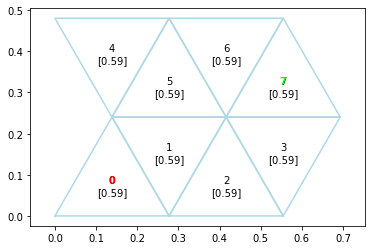

In [5]:
plot2D(grid.input_data, grid.curr_um, True, active_cells=active_cells, target_percents=target_percents)

In [6]:
view3D = plot3D(grid.curr_um, grid.input_data)
view3D.show()

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(PointLight(color='#999999', position=(0…

In [7]:
grid.deploy(active_cells, target_percents, view3D)

success: True 

energies:
   -1.999735: Full
    0.000262: Elastic
   -1.999996: Deployment
    0.000000: Repulsion
    0.000000: Attraction
    0.000000: AngleBoundPenalty



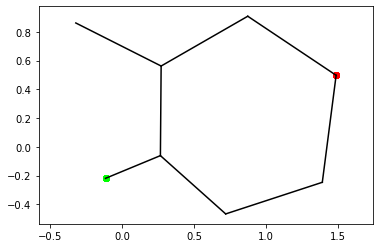

In [8]:
# if grid.rows==1 or grid.cols==1:
projection2D(grid.input_data, grid.curr_um, active_cells=active_cells, target_percents=target_percents)

In [9]:
sview_vm = plot3D_stress(grid.curr_um, 'maxBending')
sview_vm.show()

maxBending Stresses Extrem values:
    max : 4.96e+01
    min : 0.00e+00


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(PointLight(color='#999999', position=(0…

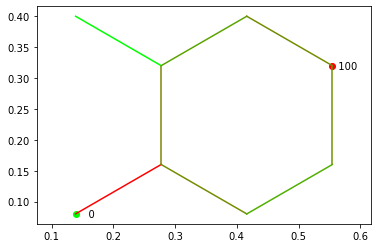

In [10]:
plot2D_stress(grid.curr_um, grid.input_data, grid.init_center_pos, active_cells, target_percents, show_percent=True)

In [11]:
deploy_in_steps(grid.curr_um,
                grid.input_data,
                grid.init_heights,
                grid.init_center_pos,
                grid.plate_thickness,
                active_cells,
                target_percents,
                steps=10,
                show_percent=True,
                dir_name='test',
                show_plot=False)

In [12]:
!ffmpeg  -loglevel panic -f image2 -r 2 -pattern_type glob -i './images/test/*structure*.jpg' images/test/structure.gif
!ffmpeg  -loglevel panic -f image2 -r 2 -pattern_type glob -i './images/test/*sPlot*.jpg' images/test/sPlot.gif

In [13]:
# (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)